# წრფივი რეგრესია - უკუ გრადიენტის მეთოდი

In [99]:
import numpy as np
import matplotlib.pyplot as plt

უკუ გრადიენტის ოპტიმიზაციის მეთოდი ითვალისწინებს გარკვეული ცდომილების ფუნქციის (2) შემოტანას, რომლის დანიშნულებაც იქნება მოდელის მიერ გაკეთებული პროგნოზის შეფასება. პროგნოზი დამოკიდებულია $w$ და $b$ პარამეტრებზე.

ერთ-ერთი მსგავსი ფუნქციაა საშვალო კვადრატული სხვაობა (Mean Squared Error).

ეს ფუნქცია როგორც წესი აღინიშნება $J$ ან $C$ სიმბოლოთი (2).

$$
\begin{align}

\overline{y}_i &= w x_i + b \\
C(w, b) &= \frac{1}{2m} \sum_{i=0}^{m}{(\overline{y}_i - y_i)^2} \\

\end{align}
$$

(1) და (2) ფორმულებიდან: 

$x_i$ - მონაცემი

$\overline{y}_i$ - მოცემული მონაცემისთვის პროგნოზი

$w$ - დახრილობა

$b$ - $y$ ღერძთან გადაკვეთის წერტილი

$C(w, b)$ - ცდომილების ფუნქცია

ჩვენი მიზანია ვიპოვოთ ისეთი $w$ და $b$, რომლებისთვისაც ცდომილება (2) იქნება მინიმალური.

$$

\begin{align*}
&Minimize: C \\

w &= w - \alpha \frac{dC}{dw} \tag{3.1} \\
b &= b - \alpha \frac{dC}{db} \tag{3.2} \\

\end{align*}
$$

ამისათვის: 
1. $w$, $b$ პარამეტრებს ვირჩევთ შემთხვევითად.

In [100]:
def initialize(dim):
  w = np.random.rand(dim)
  b = np.random.rand()
  return w, b

2. ვაკეთებთ პროგნოზს (1).

In [101]:
def predict_y(X, w, b):
  if len(w) == 1:
    w = w[0]
    return X * w + b
  return np.dot(X, w) + b

3. ვითვლით ცდომილებას (2).

In [102]:
def compute_cost(y, y_hat):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum(np.square(y_hat - y))
    return cost

4. $w$ და $b$ პარამეტრებს ვცვლით ზემოთ მოცემული ფორმულებით: (3.1), (3.2).

ფორმულების ახსნა:

(1) და (2) ფორმულების გაერთიანებით ცდომილების ფუნქციის სრული სახე იქნება შემდეგნაირი:

$$
\begin{align*}
C = \frac{1}{2m} \sum_{i=0}^{m}{((w x_i + b) - y_i)^2} \tag{4} \\
\end{align*}
$$

(3.1) გამოსახულებაში მოცემული $\frac{dC}{dw}$ აღნიშნავს ცდომილების ფუნქციის კერძო წარმოებულს $w$ პარამეტრის მიმართ.

ვინაიდან $w$ თავის მხრივ მოქცეულია $\overline{y}$ ფუნქციაში, წარმოებულის საპოვნელად უნდა გამოვიყენოთ ჯაჭვის წესი (chain rule):
1. $C$ ფუნქციას ვაწარმოებთ $\overline{y}$-ის მიმართ $\frac{dC}{d\overline{y}}$.
2. $\overline{y}$-ს ვაწარმოებთ $w$-ს მიმართ $\frac{d\overline{y}}{dw}$.
3. მათი ნამრავლი გვაძლევს $C$-ს კერძო წარმოებულს $w$-ს მიმართ $\frac{dC}{dw}$ (5.1).

$$
\begin{align*}

\frac{dC}{dw} = \frac{dC}{d\overline{y}} \cdot \frac{d\overline{y}}{dw} 
\qquad \frac{dC}{d\overline{y}} = \frac{1}{m} \sum{(\overline{y} - y)}
\qquad \frac{d\overline{y}}{dw} = x_i  \\

\end{align*}
$$

$$
\begin{align*}

\frac{dC}{dw} = \frac{1}{m} \sum{(\overline{y} - y)} \cdot x_i \tag{5.1}

\end{align*}
$$

მსგავსად ვიქცევით $b$ პარამეტრის შემთხვევაშიც: 

1. $C$ ფუნქციას ვაწარმოებთ $\overline{y}$-ის მიმართ $\frac{dC}{d\overline{y}}$.
2. მაგრამ აქ უკვე $\overline{y}$-ს ვაწარმოებთ $b$-ს მიმართ $\frac{d\overline{y}}{db}$ და არა $w$-ს.
3. აქაც, მათი ნამრავლი გვაძლევს $C$-ს კერძო წარმოებულს $b$-ს მიმართ $\frac{dC}{db}$ (5.2).

$$
\begin{align*}

\frac{dC}{db} &= \frac{dC}{d\overline{y}} \cdot \frac{d\overline{y}}{db} 
\qquad \frac{d\overline{y}}{db} &= 1 \\


\end{align*}
$$

$$
\begin{align*}

\frac{dC}{db} &= \frac{1}{m} \sum{(\overline{y} - y)} \cdot 1 \tag{5.2}

\end{align*}
$$

კერძო წარმოებულები უკვე ვიპოვეთ, შესაბამისად შეგვიძლია განვაახლოთ $w$ და $b$.

**$w$-ს განახლება**

(3.1) გამოსახულებაში შევიტანოთ (5.1) მიღებული შედეგი: 

$$
\begin{align*}
w &= w - \alpha \frac{dC}{d\overline{y}} \cdot \frac{d\overline{y}}{dw} \tag{6.1} \\
  &= w - \alpha \frac{1}{m} \sum{(\overline{y} - y)} \cdot x_i
\end{align*}
$$

**$b$-ს განახლება**

(3.2) გამოსახულებაში შევიტანოთ (5.2) მიღებული შედეგი:

$$
\begin{align*}
b &= b - \alpha \frac{dC}{d\overline{y}} \cdot \frac{d\overline{y}}{db} \tag{6.2} \\
  &= b - \alpha \frac{1}{m} \sum{(\overline{y} - y)} \cdot 1
\end{align*}
$$

კალკულუსიდა ვიცით, რომ ფუნქციის უარყოფითი გრადიენტი გვიჩვენებს მიმართულებას, რომელიც ფუნქციის მნიშვნელობას ყველაზე მეტად ამცირებს.

შესაბამისად თუ $w$ და $b$ პარამეტრებს უარყოფითი გრადიენტის მცირე ნაწილს გამოვაკლებთ და ამას მრავალჯერ გავიმეორებთ, რამდენიმე იტერაციის შემდეგ მივიღებთ ისეთ მნიშვნელობებს, რომლებისთვისაც ცდომილების ფუნქცია C-ს ექნება მინიმალური მნიშვნელობა.

(6.1), (6.2) გამოსახულებებში მოცემული გვაქვს კიდევ ერთი წერვი: $\alpha$, რომელიც წარმოადგენს ფუნქციის ჰიპერპარამეტრს. $\alpha$ როგორც წესი პატარა რიცხვია (0.1, 0.01, 0.001...), რათა პამეტრების განახლება მოხდეს მცირედით. წინააღმდეგ შემთხვევაში შესაძლოა გავცდეთ ფუნქციის მინიმუმს.

<img src="image.png" alt="Gradient Descent" width="400"/>

In [103]:
def update_parameters(X, y, y_hat, w, b, learning_rate):
  m = len(y)
  dC_dw = np.dot(y_hat - y, X) / m
  dC_db = np.sum(y_hat - y) / m

  w_new = w - learning_rate * dC_dw
  b_new = b - learning_rate * dC_db
  return w_new, b_new

In [104]:
def gradient_descent(X, y, learning_rate, epochs, stopping_threshold = 1e-6):
  dims = 1
  if len(X.shape) > 1:
    dims = X.shape[1]

  w, b = initialize(dims)
  previous_cost = None
  cost_cache = np.zeros(epochs)
  for epoch in range(epochs):
    y_hat = predict_y(X, w, b)
    cost = compute_cost(y, y_hat)
    # early stopping criteria
    if previous_cost and abs(previous_cost - cost) <= stopping_threshold:
      break
    cost_cache[epoch] = cost
    previous_cost = cost
    old_w = w
    old_b = b
    w, b = update_parameters(X, y, y_hat, old_w, old_b, learning_rate)

  return w, b, cost_cache

In [105]:
learning_rate = 0.0001 # იგივე ალფა
epochs = 1000

m = 200

In [106]:
np.random.seed(42)

X_2d = 10 * np.random.rand(m, 2)

true_weights = np.array([3, 4]) 
bias = 2  
y_2d = X_2d.dot(true_weights) + bias + np.random.randn(m) # add noise

w_2d, b_2d, cost_cache_2d = gradient_descent(X_2d, y_2d, learning_rate, epochs)
print(w_2d, b_2d)

[3.30894284 3.787046  ] 1.282428874489976


გრაფიკზე ვხედავთ, რომ ყოველ იტერაციაზე ცდომილება მცირდება

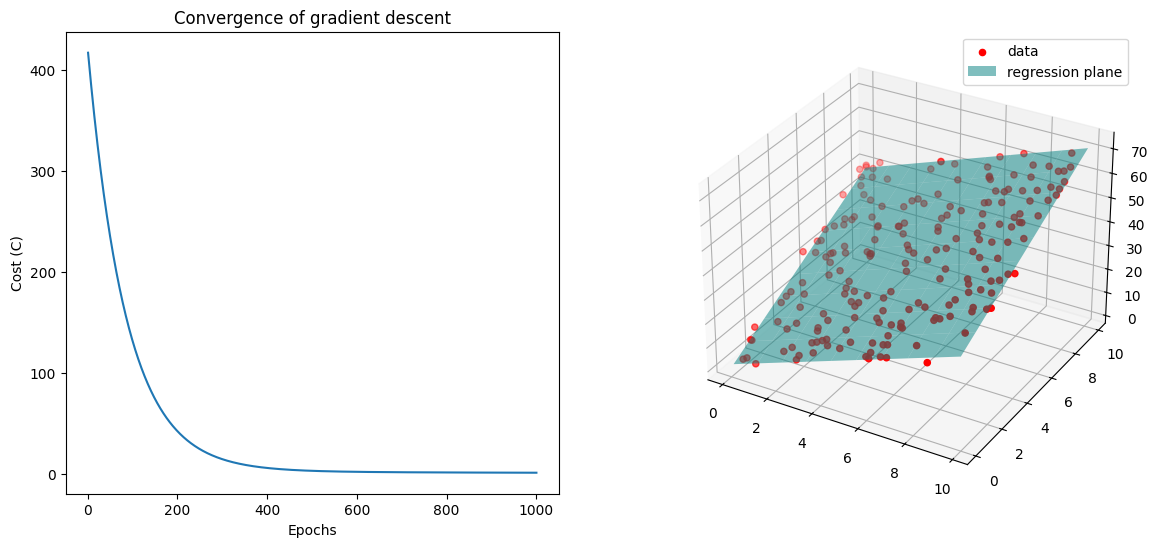

In [107]:
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121)

ax1.plot(range(1, epochs + 1), cost_cache_2d)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Cost (C)')
ax1.set_title('Convergence of gradient descent')

ax2 = fig.add_subplot(122, projection="3d")
x1_range = np.linspace(min(X_2d[:, 0]), max(X_2d[:, 0]), 10)
x2_range = np.linspace(min(X_2d[:, 1]), max(X_2d[:, 1]), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_plane = w_2d[0] * x1_grid + w_2d[1] * x2_grid + b_2d

ax2.scatter(X_2d[:,0], X_2d[:,1], y_2d, color="red", label="data")
ax2.plot_surface(x1_grid, x2_grid, y_plane, color='teal', alpha=0.5, label='regression plane')
ax2.legend()


plt.show()

In [108]:
np.random.seed(42)

X_1d = 10 * np.random.rand(m)
y_1d = X_1d * 2 + 3 + np.random.rand(m)

w_1d, b_1d, cost_cache_1d = gradient_descent(X_1d, y_1d, learning_rate, epochs)
print(w_1d, b_1d)

[2.25055269] 1.2897888271206772


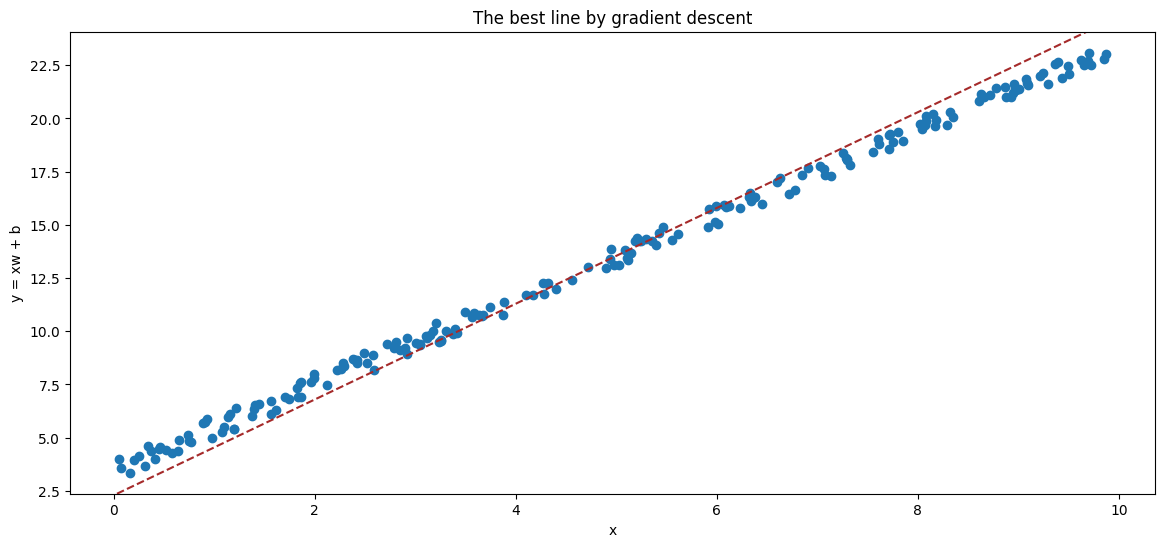

In [109]:
fig = plt.figure(figsize=(14, 6))

ax2 = fig.add_subplot(111)
ax2.scatter(X_1d, y_1d)
ax2.set_title("The best line by gradient descent")
ax2.set_xlabel("x")
ax2.set_ylabel("y = xw + b")
ax2.axline((X_1d.mean(), y_1d.mean()), slope=w_1d[0], linestyle="--", color="brown")

plt.show()

# გამოთვლები სლაიდებისთვის

In [110]:
np.random.seed(0)

x = np.arange(1, 10)
y = 0.4 * x + 3 + np.random.uniform(-2, 2, size=len(x))

In [111]:
w = 2
b = 1

In [112]:
y_hat = x * w + b
compute_cost(y, y_hat)

np.float64(22.15131835014242)

In [113]:
dC_dw = np.dot(y_hat - y, x) / m
dC_db = np.sum(y_hat - y) / m

learning_rate = 0.1
w = w - learning_rate * dC_dw
b = b - learning_rate * dC_db

In [114]:
w, b

(np.float64(1.8336618262031479), np.float64(0.9755484426286393))

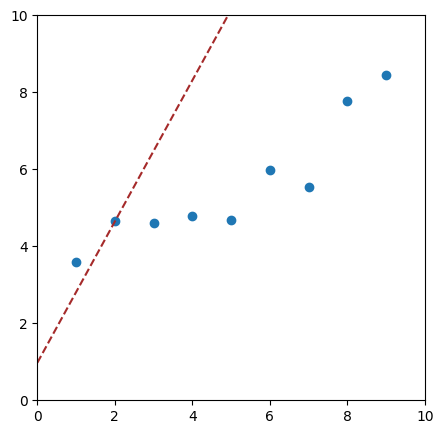

In [115]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.set_xlim(min(x.min(), y.min())-1, max(x.max(), y.max())+1)
ax.set_ylim(min(x.min(), y.min())-1, max(x.max(), y.max())+1)

ax.scatter(x, y)
ax.plot(ax.get_xlim(), np.array(ax.get_xlim()) * w + b, linestyle="--", color="brown")

plt.show()